In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Import dataset
data_raw = pd.read_csv('marvel_imdb_data.csv')
df = pd.DataFrame(data_raw)

In [3]:
#Data preprocessing 
df.columns = [x.replace(' ',"_").lower() for x in df.columns]
df = df.drop(columns = ["uniq_id",'crawl_timestamp', 'pageurl', 'movie_rating', 
                   'plot', 'cast', 'filming_locations', 'language','collection_date'])
df['title'] = df['title'].apply(lambda x: x[:-13])
df['release_date'] = df['release_date'].apply(lambda x: str(x)[:-6])
df = df.dropna()

In [4]:
df_clean = df.copy()


In [5]:
#Converting string to int values
df_clean['collection'] = df_clean['collection'].apply(lambda x: x.replace(",","").replace("$",""))
df_clean['budget'] = df_clean['budget'].apply(lambda x: x.replace(",","").replace("$",""))
df_clean['budget']= df_clean['budget'].astype(int)
df_clean['collection'] = df_clean['collection'].astype('int64')

In [6]:
df_clean.dtypes

title              object
genres             object
release_date       object
review_rating     float64
movie_run_time     object
budget              int32
collection          int64
dtype: object

In [7]:
df_clean.head(5)

,title,genres,release_date,review_rating,movie_run_time,budget,collection
1,Iron Man 2,Action|Adventure|Sci-Fi,7 May 2010,7.0,124 min,200000000,623933331
2,Guardians of the Galaxy,Action|Adventure|Comedy|Sci-Fi,1 August 2014,8.1,121 min,170000000,774176600
3,Black Panther,Action|Adventure|Sci-Fi,16 February 2018,7.3,134 min,200000000,1347071259
4,Iron Man 3,Action|Adventure|Sci-Fi,3 May 2013,7.2,130 min,200000000,1215439994
5,The Incredible Hulk,Action|Adventure|Sci-Fi,13 June 2008,6.7,112 min,150000000,263427551


In [8]:
df_clean.describe()

,review_rating,budget,collection
count,21.000000,2.100000e+01,2.100000e+01
mean,7.538095,1.951905e+08,9.626372e+08
std,0.554505,5.804534e+07,5.860742e+08
min,6.700000,1.300000e+08,2.634276e+08
25%,7.100000,1.620000e+08,6.226741e+08
50%,7.500000,1.750000e+08,7.741766e+08
75%,7.900000,2.000000e+08,1.215440e+09
max,8.800000,3.560000e+08,2.681989e+09


In [9]:
df_clean.sort_values('budget', ascending = False).head(3)

,title,genres,release_date,review_rating,movie_run_time,budget,collection
14,Avengers: Endgame,Action|Adventure|Sci-Fi,26 April 2019,8.8,181 min,356000000,2681988528
11,Avengers: Infinity War,Action|Adventure|Sci-Fi,27 April 2018,8.5,149 min,321000000,2048709917
9,Captain America: Civil War,Action|Adventure|Sci-Fi,6 May 2016,7.8,147 min,250000000,1153304495


Text(0.5, 1.0, 'Most expensive films')

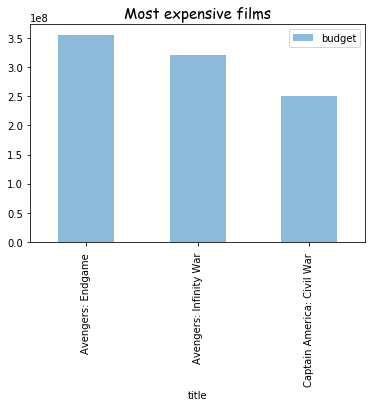

In [10]:
plt_1 = df_clean.sort_values('budget', ascending = False).head(3).plot(x = 'title', y = 'budget', kind = 'bar', alpha = 0.5)
plt_1.set_title("Most expensive films", fontname='Comic Sans MS', fontsize=15)

In [11]:
df_clean['profit'] = df_clean['collection']-df_clean['budget']
df_clean.sort_values('profit', ascending= False).head(3)

,title,genres,release_date,review_rating,movie_run_time,budget,collection,profit
14,Avengers: Endgame,Action|Adventure|Sci-Fi,26 April 2019,8.8,181 min,356000000,2681988528,2325988528
11,Avengers: Infinity War,Action|Adventure|Sci-Fi,27 April 2018,8.5,149 min,321000000,2048709917,1727709917
23,The Avengers,Action|Adventure|Sci-Fi,4 May 2012,8.1,143 min,220000000,1519557910,1299557910


Text(0.5, 1.0, 'Top 3 films (profit)')

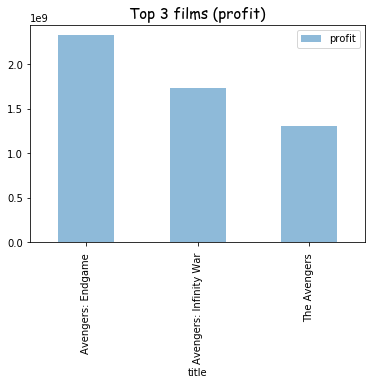

In [12]:
plt_2= df_clean.sort_values('profit', ascending= False).head(3).plot(x = 'title', y = 'profit', kind = 'bar', 
                                                                    alpha = 0.5)
plt_2.set_title("Top 3 films (profit)", fontname='Comic Sans MS', fontsize=15)

In [13]:
df_clean['ROI'] = (df_clean['collection']-df_clean['budget'])/df_clean['budget'] * 100

In [14]:
df_clean.sort_values('ROI', ascending= False).head(3)

,title,genres,release_date,review_rating,movie_run_time,budget,collection,profit,ROI
14,Avengers: Endgame,Action|Adventure|Sci-Fi,26 April 2019,8.8,181 min,356000000,2681988528,2325988528,653.367564
23,The Avengers,Action|Adventure|Sci-Fi,4 May 2012,8.1,143 min,220000000,1519557910,1299557910,590.708141
3,Black Panther,Action|Adventure|Sci-Fi,16 February 2018,7.3,134 min,200000000,1347071259,1147071259,573.535630


Text(0.5, 1.0, 'Top 3 films (ROI)')

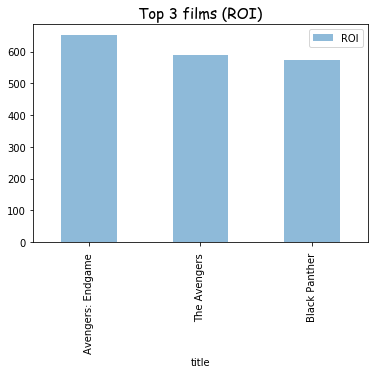

In [15]:
plt_3 = df_clean.sort_values('ROI', ascending= False).head(3).plot(x = 'title', y = 'ROI', kind = 'bar', alpha = 0.5)
plt_3.set_title("Top 3 films (ROI)", fontname='Comic Sans MS', fontsize=15)